#NAIVE BAYES WINE DATASET

##Dataset:

- Link: https://archive.ics.uci.edu/dataset/109/wine



##Meta-Data of the Wine Dataset:

 - These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The attributes are as follows:

- Class: target, the category of cultivator, discrete, values: 1, 2, 3
- Alcohol: the alcohol content in the wine, numerical
- Malic acid: the malic acid content in the wine, numerical
- Ash: the ash content in the wine, numerical
- Alcalinity of ash: the alcanity of ash present in the wine, numerical
- Magnesium: the magnesium content in the wine, numerical
- Total phenols: the total amount of phenols in the wine, numerical
- Flavanoids: the flavanoids content in the wine, numerical
- Nonflavanoid phenols: the content of nonflavanoid phenols in the wine, numerical
- Proanthocyanins: the content of proanthocyanins in the wine, numerical
- Hue: the amount of hue added to the wine, numerical
- OD280/OD315 of diluted wines: a standard measure of the quality of wine, numerical
- Proline: the proline content in the wine, numerical
- Total Number of Samples: 178

- Samples per class: 59, 71, 48

### Problem Statement:
**"Classify wines into one of three cultivators based on their chemical properties."**

This problem involves building a classification model that can predict which **cultivator** a wine sample belongs to, using the following 13 chemical properties as features:

1. Alcohol
2. Malic Acid
3. Ash
4. Alcalinity of Ash
5. Magnesium
6. Total Phenols
7. Flavanoids
8. Nonflavanoid Phenols
9. Proanthocyanins
10. Color Intensity
11. Hue
12. OD280/OD315 (Proline)
13. Proline

### Objective:
- **Develop a machine learning model** that accurately classifies wine samples into one of the three cultivator classes based on the chemical properties.
- The cultivator types are represented by three target classes (1, 2, and 3), and the goal is to minimize classification errors.

### Performance Metrics:
- **Accuracy**: How many wine samples are classified correctly.
- **Confusion Matrix**: To analyze the specific misclassifications.
- **Precision, Recall, and F1-Score**: For a more detailed performance evaluation, especially for imbalanced classes.

This classification task can be approached using different algorithms, including Naive Bayes, Decision Trees, Support Vector Machines, etc., to determine which model performs best.

In [27]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data_path = "/content/drive/MyDrive/0.Latest_DS_Course/SL/Data/wine.csv"


# Load the wine dataset

In [30]:

# Adding 'header=None' since the original CSV might not contain headers
wine_df = pd.read_csv(data_path, header=None, names=[
    "Cultivator", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium",
    "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
    "Color_intensity", "Hue", "OD280", "Proline"
])

## Data Inspection:

In [31]:
# Previewing the dataset: descriptive statistics and raw data
display("Dataset Description:\n", wine_df.describe().transpose())


'Dataset Description:\n'

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [32]:
display("\nFirst 10 rows of the dataset:\n", wine_df.head(10))

'\nFirst 10 rows of the dataset:\n'

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [33]:
wine_df.to_csv("wine.csv")

In [34]:
# Checking the dataset shape and types
print("\nShape of the dataset:", wine_df.shape)
print("\nDataset info:\n")
wine_df.info()


Shape of the dataset: (178, 14)

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)


In [35]:
wine_df.columns

Index(['Cultivator', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [36]:
wine_df['Proline'] = wine_df['Proline'].astype(np.int64)
wine_df['Magnesium'] = wine_df['Magnesium'].astype(np.int64)

In [37]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Data Cleaning:

In [38]:
# Checking for missing values
print(wine_df.isnull().sum())

Cultivator              0
Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity_of_Ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [39]:
wine_df.duplicated().sum()

np.int64(0)

## Check data distribution

<Axes: xlabel='Cultivator', ylabel='count'>

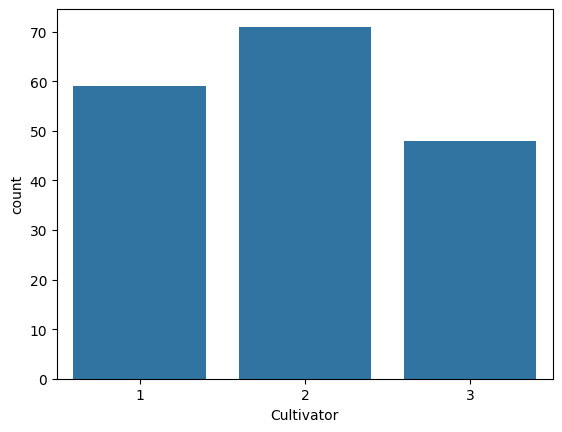

In [40]:
sns.countplot(data=wine_df, x="Cultivator")

In [41]:
wine_df['Cultivator'].value_counts(normalize=True)

,proportion
Cultivator,
2,0.398876
1,0.331461
3,0.269663


## Univariate Analysis

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(df, column):
    """Creates a side-by-side histogram and boxplot for a given column."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

    print(df[column].describe())



In [43]:
wine_df.columns

Index(['Cultivator', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

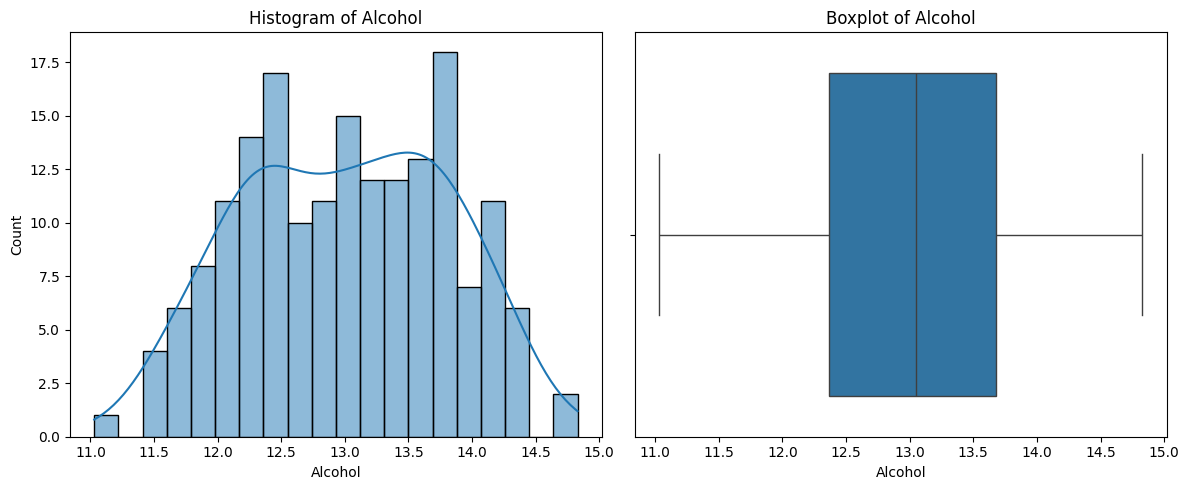

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Alcohol, dtype: float64


In [44]:
histogram_boxplot(wine_df, "Alcohol")

Here are the **observations from the Histogram and Boxplot of Alcohol**:

---

###  **Histogram of Alcohol**:
1. The distribution of alcohol content is **roughly symmetric**, with a slight skew towards the right.
2. Most wines have an alcohol content in the range of **12.0 to 14.0**.
3. The histogram shows a **unimodal distribution**, peaking between **12.5 and 13.5**.
4. There's a **gradual decline** in frequency on both extremes, with very few samples below **11.5** or above **14.5**.

---

###  **Boxplot of Alcohol**:
1. The **median alcohol content** is around **13.0**, indicating that half the wines fall below and above this value.
2. The box (interquartile range or IQR) is **moderately wide**, showing a fair level of variability in alcohol levels.
3. There are **no significant outliers**, indicating that alcohol content is consistently measured across samples.
4. The distribution appears **fairly balanced** on both sides of the median in the boxplot.

---


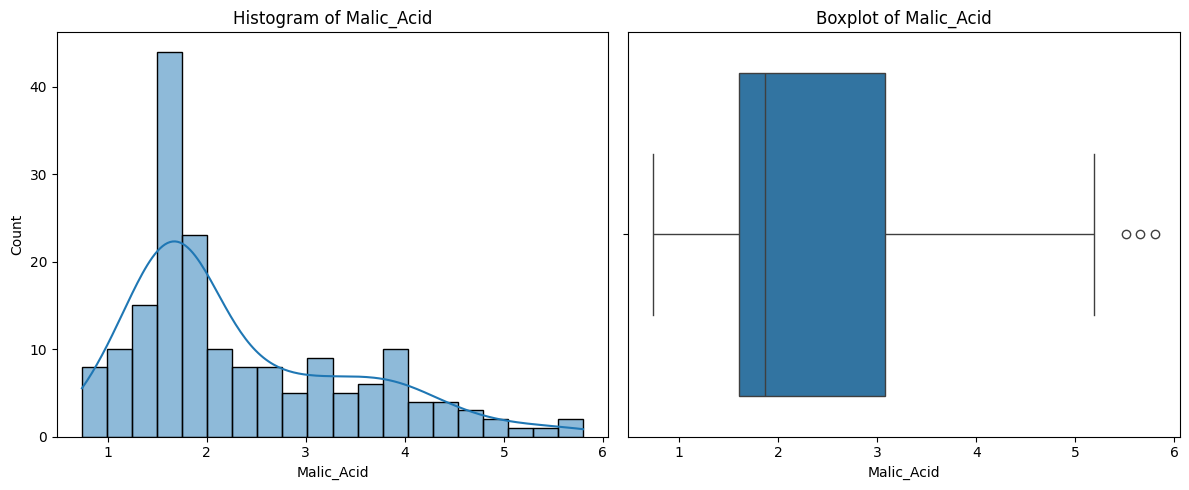

count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: Malic_Acid, dtype: float64


In [45]:
histogram_boxplot(wine_df, "Malic_Acid")

Here are the **observations from the Histogram and Boxplot of Malic_Acid**:

---

###  **Histogram of Malic_Acid**:
1. The distribution is **right-skewed** (positively skewed), with most values concentrated at the lower end (1.0 to 2.5).
2. A large number of wines have **malic acid content between 1.0 and 2.0**.
3. There are **fewer samples** with higher malic acid content (above 4.0), indicating these are relatively rare.
4. The distribution is **not symmetric**, with a long tail on the right.

---

###  **Boxplot of Malic_Acid**:
1. The **median** malic acid value lies closer to the **lower quartile**, reinforcing the skewness observed in the histogram.
2. The **IQR (box width)** is moderately wide, indicating some variability.
3. There are **a few outliers** on the higher end (above ~5.0), which match the tail seen in the histogram.
4. The lower bound of the box is tight, indicating many values are clustered near the lower end.

---


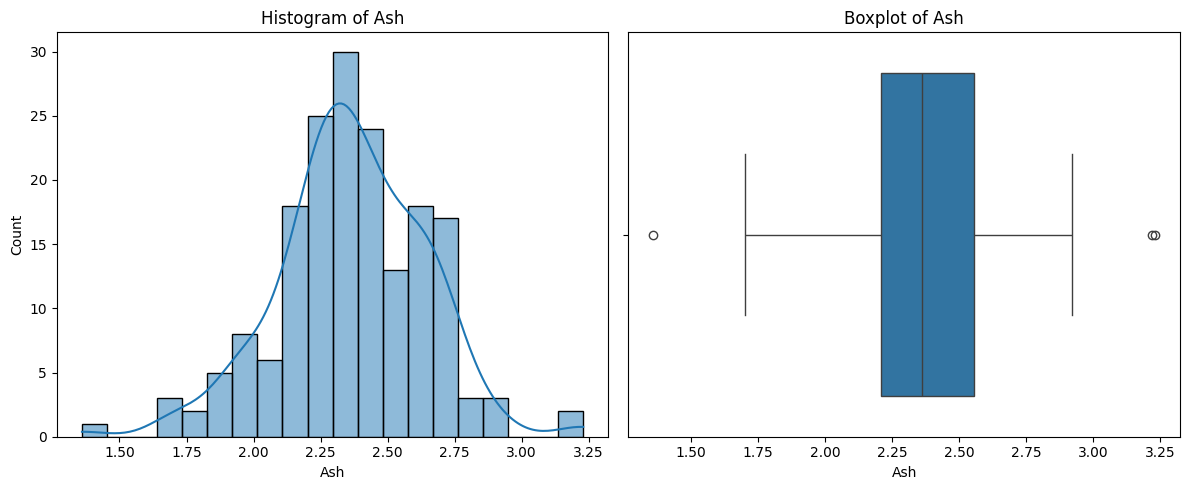

count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: Ash, dtype: float64


In [46]:
histogram_boxplot(wine_df, "Ash")

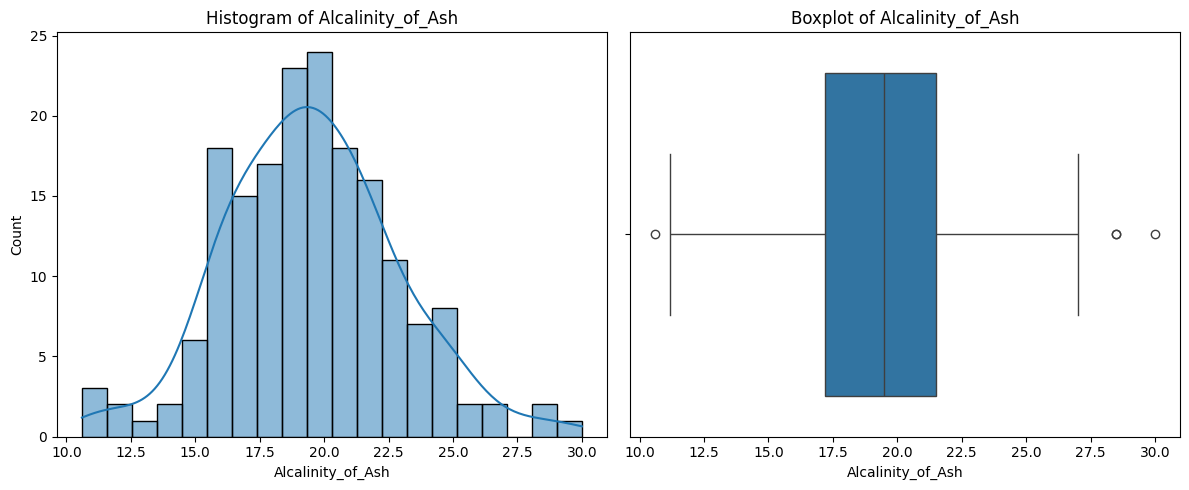

count    178.000000
mean      19.494944
std        3.339564
min       10.600000
25%       17.200000
50%       19.500000
75%       21.500000
max       30.000000
Name: Alcalinity_of_Ash, dtype: float64


In [47]:
histogram_boxplot(wine_df, "Alcalinity_of_Ash")

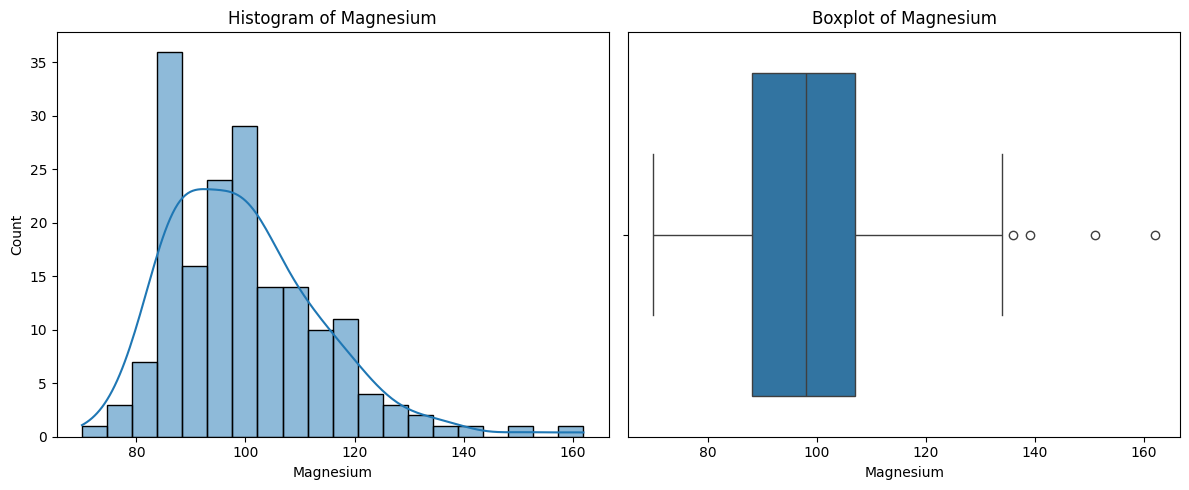

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: Magnesium, dtype: float64


In [48]:
histogram_boxplot(wine_df, "Magnesium")

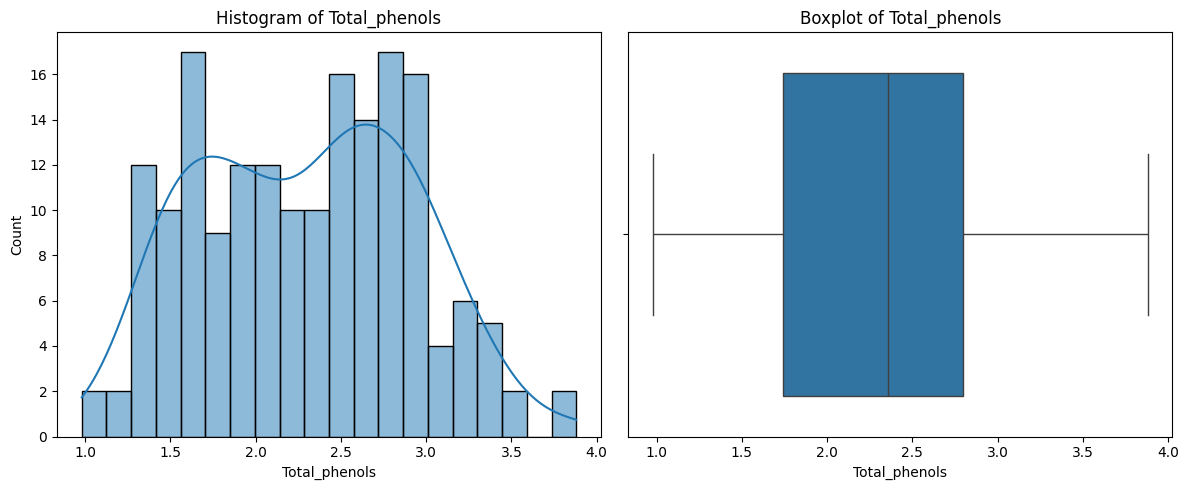

count    178.000000
mean       2.295112
std        0.625851
min        0.980000
25%        1.742500
50%        2.355000
75%        2.800000
max        3.880000
Name: Total_phenols, dtype: float64


In [49]:
histogram_boxplot(wine_df, "Total_phenols")

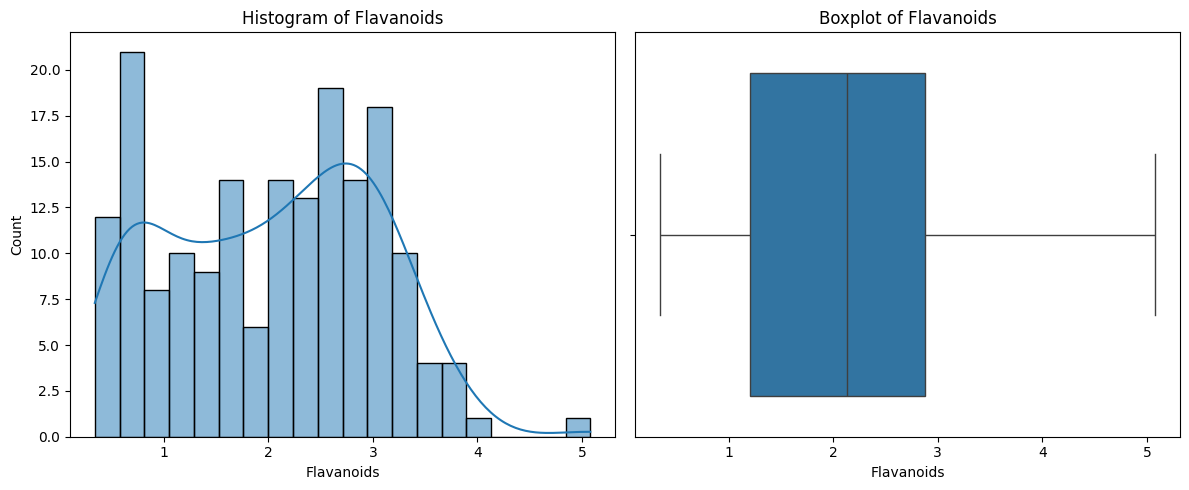

count    178.000000
mean       2.029270
std        0.998859
min        0.340000
25%        1.205000
50%        2.135000
75%        2.875000
max        5.080000
Name: Flavanoids, dtype: float64


In [50]:
histogram_boxplot(wine_df, "Flavanoids")

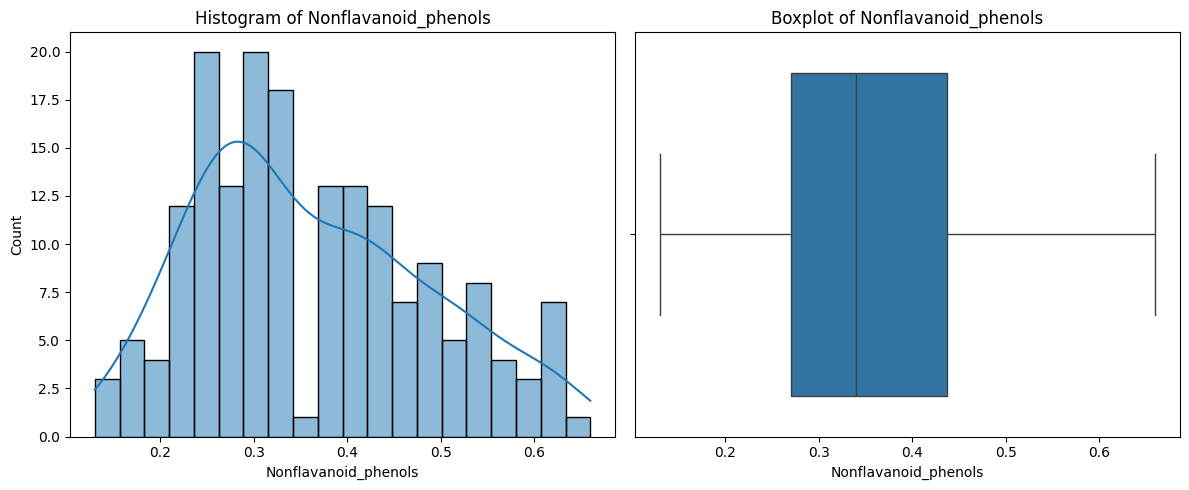

count    178.000000
mean       0.361854
std        0.124453
min        0.130000
25%        0.270000
50%        0.340000
75%        0.437500
max        0.660000
Name: Nonflavanoid_phenols, dtype: float64


In [51]:
histogram_boxplot(wine_df, "Nonflavanoid_phenols")

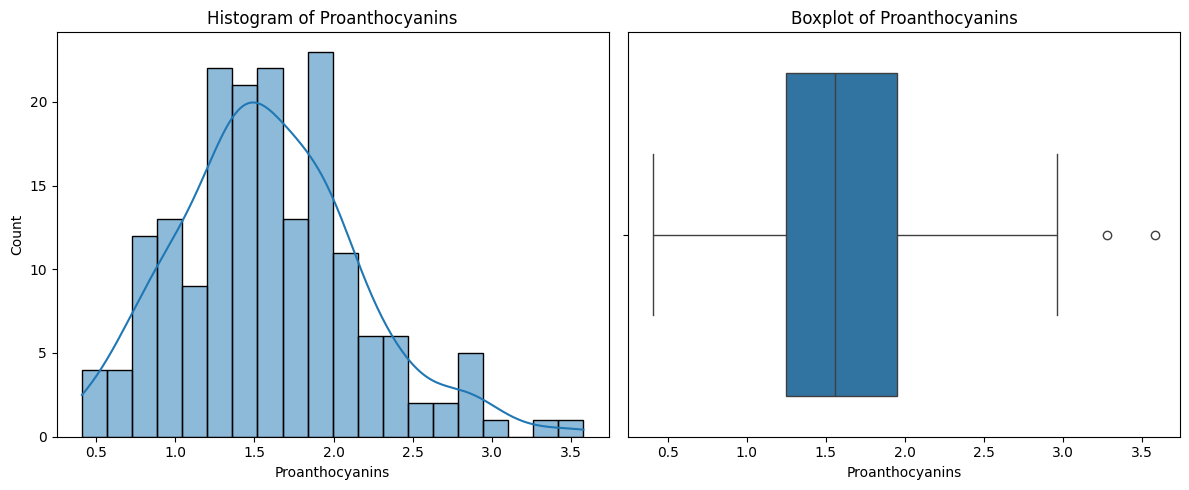

count    178.000000
mean       1.590899
std        0.572359
min        0.410000
25%        1.250000
50%        1.555000
75%        1.950000
max        3.580000
Name: Proanthocyanins, dtype: float64


In [52]:
histogram_boxplot(wine_df, "Proanthocyanins")

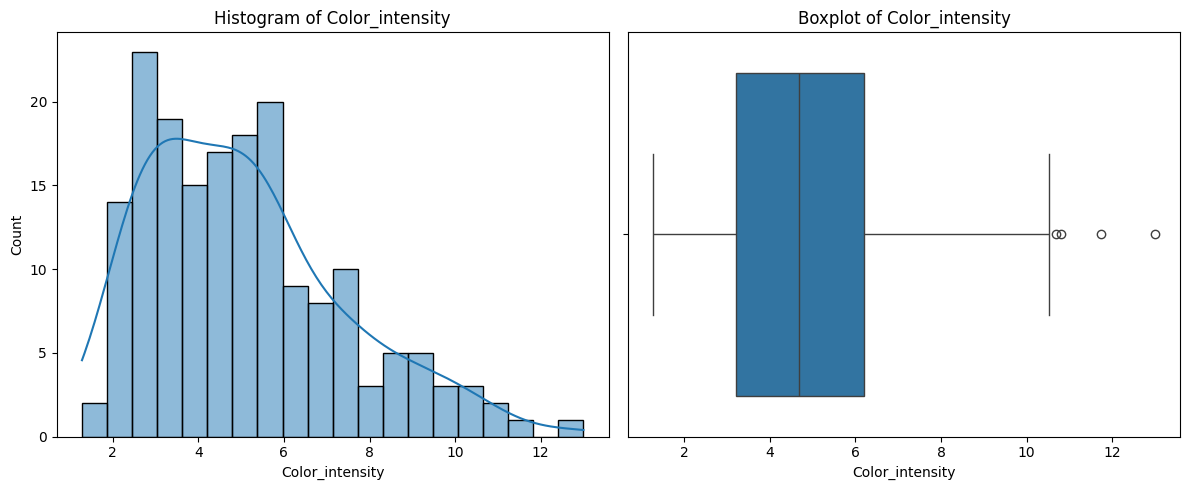

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: Color_intensity, dtype: float64


In [53]:
histogram_boxplot(wine_df, "Color_intensity")

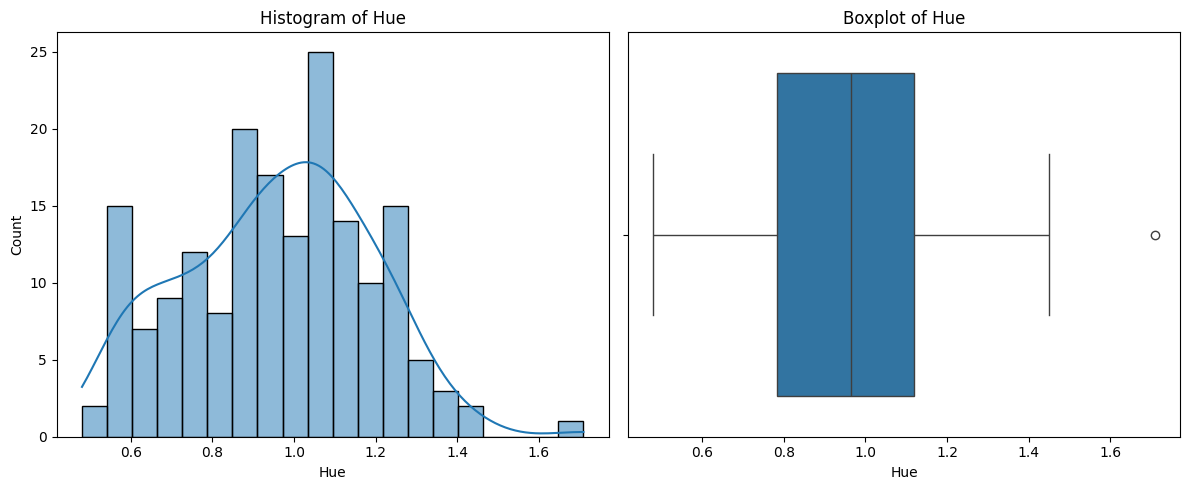

count    178.000000
mean       0.957449
std        0.228572
min        0.480000
25%        0.782500
50%        0.965000
75%        1.120000
max        1.710000
Name: Hue, dtype: float64


In [54]:
histogram_boxplot(wine_df, "Hue")

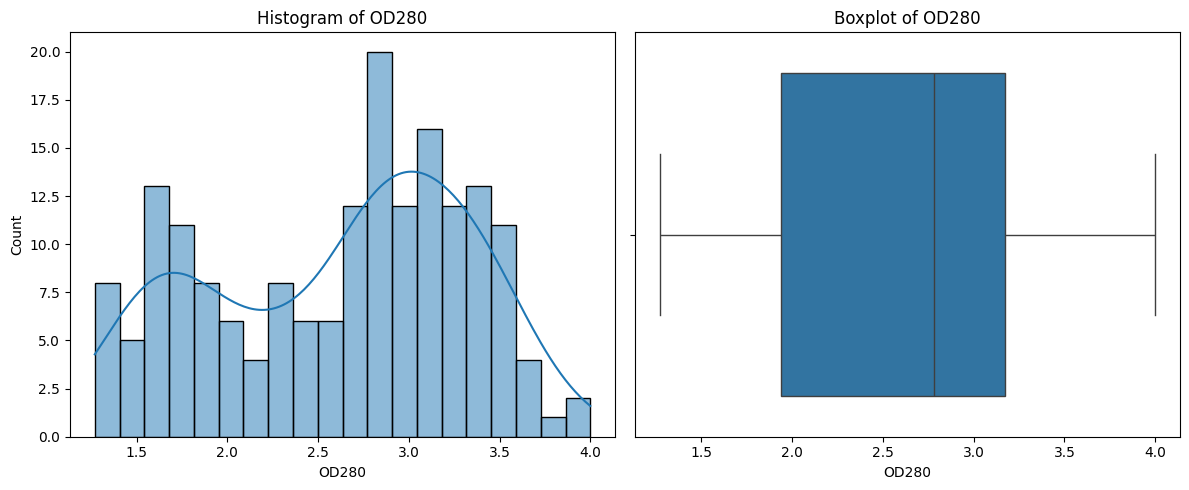

count    178.000000
mean       2.611685
std        0.709990
min        1.270000
25%        1.937500
50%        2.780000
75%        3.170000
max        4.000000
Name: OD280, dtype: float64


In [55]:
histogram_boxplot(wine_df, "OD280")

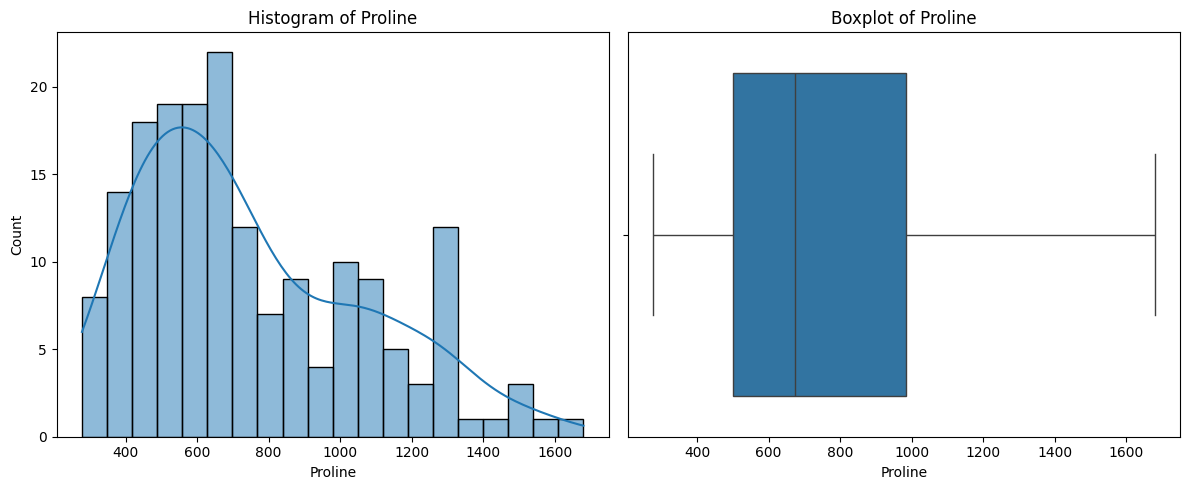

count     178.000000
mean      746.893258
std       314.907474
min       278.000000
25%       500.500000
50%       673.500000
75%       985.000000
max      1680.000000
Name: Proline, dtype: float64


In [56]:
histogram_boxplot(wine_df, "Proline")

## Bivariate Analysis

In [57]:


def plot_boxplot(df, column, target='Cultivator'):
    """
    Creates a boxplot for a numerical column against the target column.

    Parameters:
        df (pd.DataFrame): The dataset.
        column (str): The numerical column to plot.
        target (str): The categorical column (default is 'class').
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[target], y=df[column])
    plt.title(f"Boxplot of {column} vs {target}")
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()



In [58]:
wine_df.columns

Index(['Cultivator', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

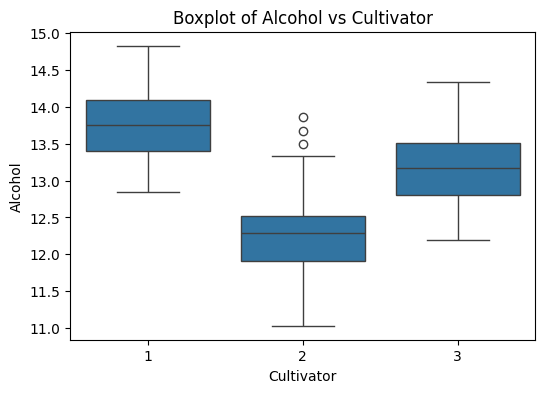

In [59]:
plot_boxplot(wine_df, 'Alcohol')

**Observations from Boxplot (Alcohol vs Cultivator):**

1. Cultivator 1 exhibits the highest Alcohol content overall, with a tight distribution and median around 13.8.
2. Cultivator 2 has the lowest Alcohol levels among all, with a median near 12.3 and a few outliers on the higher side.
3. Cultivator 3 shows moderate Alcohol values, with a median close to 13.2 and a slightly wider spread than Cultivator 1.
4. There is a clear distinction in Alcohol levels across the three cultivators, indicating good potential for class separation.
5. The presence of outliers in Cultivator 2 suggests some variation within this group, though overall values remain lower.

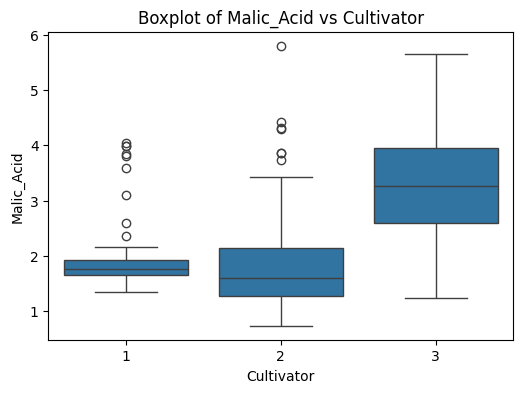

In [60]:
plot_boxplot(wine_df, 'Malic_Acid')

**Observations from Boxplot (Malic_Acid vs Cultivator):**

1. Cultivator 1 has the lowest Malic Acid levels overall, with a tight interquartile range and several high-value outliers.
2. Cultivator 2 shows moderate Malic Acid levels, with a slightly wider spread and more frequent outliers on the higher end.
3. Cultivator 3 displays the highest Malic Acid values, with a broad distribution and median around 3.5.
4. Distinct differences are evident among cultivators, especially between Cultivator 1 and Cultivator 3, suggesting strong feature separation.
5. The presence of outliers is more pronounced in Cultivator 1 and 2, while Cultivator 3 shows a more consistent range.

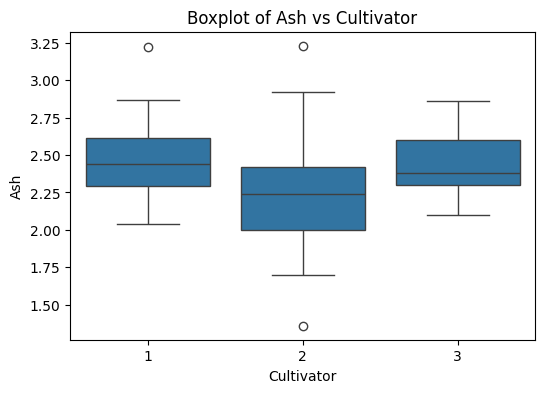

In [61]:
plot_boxplot(wine_df, 'Ash')

**Observations from Boxplot (Ash vs Cultivator):**

1. All three cultivators have similar median Ash values, suggesting minimal variation in central tendency.
2. Cultivator 2 displays slightly wider variability compared to Cultivators 1 and 3.
3. Outliers are present in Cultivators 1 and 2, with Cultivator 2 having both low and high extremes.
4. Cultivator 3 has a relatively compact distribution with fewer extreme values.
5. Overall, Ash does not appear to strongly differentiate between the cultivators.

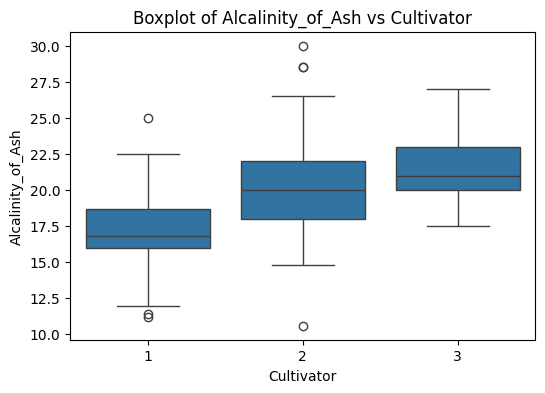

In [62]:
plot_boxplot(wine_df, 'Alcalinity_of_Ash')

**Observations from Boxplot (Alcalinity_of_Ash vs Cultivator):**

1. **Cultivator 1** has the lowest median *Alcalinity_of_Ash* and a relatively compact interquartile range (IQR), indicating lower variability.
2. **Cultivator 2** shows the **highest spread**, with a wide IQR and multiple **outliers on both extremes**, suggesting significant variation.
3. **Cultivator 3** has a **higher median** than Cultivator 1 and is more consistent than Cultivator 2, but still shows some outliers.
4. Cultivators 2 and 3 tend to have **higher alcalinity** compared to Cultivator 1.
5. These differences in spread and central tendency suggest *Alcalinity_of_Ash* might be useful for distinguishing between cultivators, especially between Cultivator 1 and the other two.

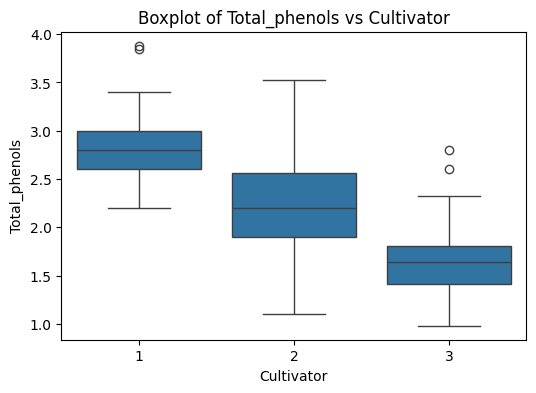

In [63]:
plot_boxplot(wine_df, 'Total_phenols')

**Observations from Boxplot (Total_phenols vs Cultivator):**

1. **Cultivator 1** shows the **highest median** and generally higher total phenol values compared to the others, indicating richer phenol content.
2. **Cultivator 2** has a **moderate median**, but exhibits the **widest spread**, suggesting more variability in total phenols across its samples.
3. **Cultivator 3** has the **lowest median** and a narrower IQR, indicating consistently lower phenol levels.
4. **Outliers** are present in all three groups, especially:
   - Cultivator 1: a few high-value outliers (~3.9).
   - Cultivator 3: moderate outliers (~2.7–2.8).
5. **This plot suggests that *Total_phenols* could be an effective variable for differentiating between cultivators, especially between Cultivator 1 and Cultivator 3**.

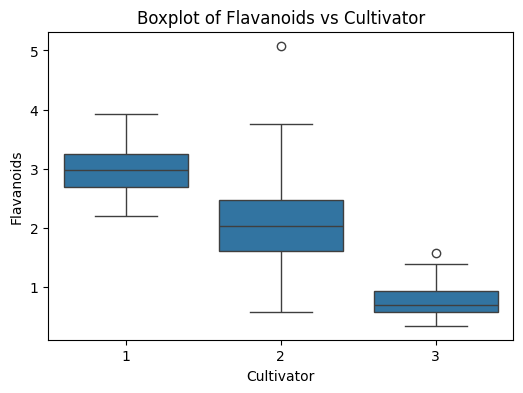

In [64]:
plot_boxplot(wine_df, 'Flavanoids')

**Observations from Boxplot (Flavanoids vs Cultivator):**

1. **Cultivator 1** has the **highest median** and a **narrow range**, indicating consistently high flavonoid levels.
2. **Cultivator 2** shows a **moderate median** but the **widest spread**, suggesting a high variability in flavonoid content.
   - It also contains **outliers**, including one extreme value above 5.
3. **Cultivator 3** has the **lowest median** and the **tightest interquartile range**, suggesting it consistently has low flavonoid levels.
   - A few mild outliers are present here as well.
4. The distinct separation in medians and ranges makes **Flavanoids a strong differentiating feature** among the three cultivators, especially between Cultivators 1 and 3.

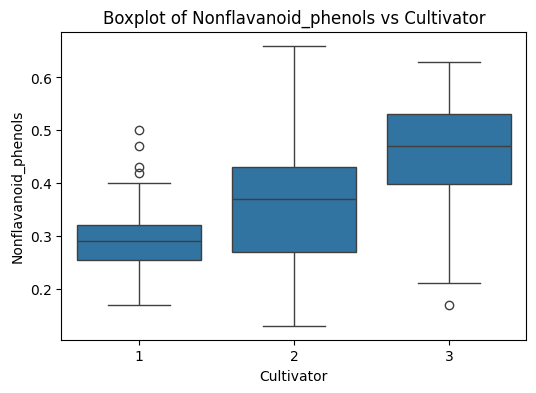

In [65]:
plot_boxplot(wine_df, 'Nonflavanoid_phenols')

**Observations from Boxplot (Nonflavanoid_phenols vs Cultivator):**

1. **Cultivator 1** has the **lowest median** and the **narrowest interquartile range (IQR)**, indicating low and consistent levels of nonflavanoid phenols.
   - It shows several **outliers on the higher side**, suggesting occasional spikes in values.

2. **Cultivator 2** has a **moderate median** with a **wide spread**, reflecting higher variability in nonflavanoid phenol content.
   - It also contains a wide range from minimum to maximum, indicating inconsistency in composition.

3. **Cultivator 3** has the **highest median** among the three and also displays a **relatively wider IQR**.
   - While it shows slightly higher variability than Cultivator 1, it maintains a generally high level of nonflavanoid phenols.

4. Overall, **Cultivator 1 has the lowest levels**, and **Cultivator 3 has the highest**, making this feature potentially useful for distinguishing between cultivators, especially between 1 and 3.

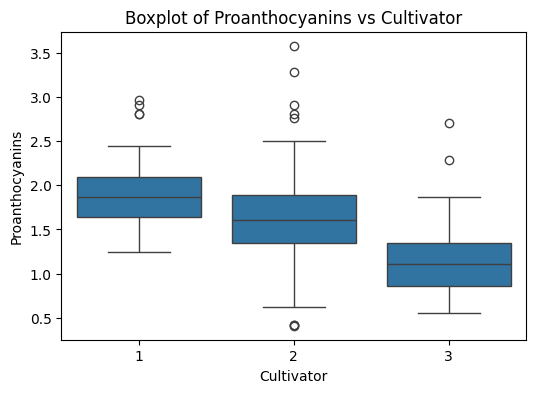

In [66]:
plot_boxplot(wine_df, 'Proanthocyanins')

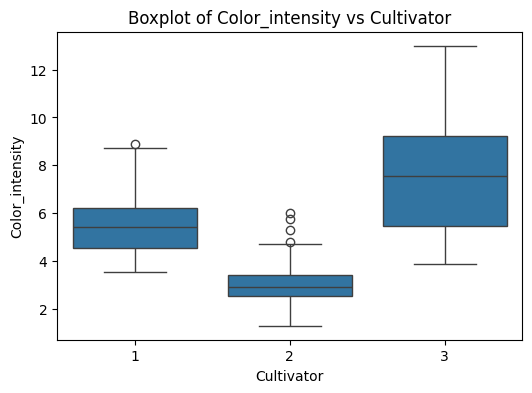

In [67]:
plot_boxplot(wine_df, 'Color_intensity')

**Observations from Boxplot (Color_intensity vs Cultivator):**

1. **Cultivator 1**:
   - Has a **moderate median** color intensity.
   - The values are **evenly spread** with a few outliers on the higher end.
   - Shows a **moderate variability** in color intensity.

2. **Cultivator 2**:
   - Has the **lowest median** and **smallest IQR**, indicating consistently low color intensity.
   - Several **upper outliers** suggest occasional samples with higher intensity, but overall it’s less intense.

3. **Cultivator 3**:
   - Shows the **highest median** and the **widest range** of color intensity values.
   - Indicates **high variability** and includes some extreme high values (up to ~13).
   - Significantly **more intense coloration** than the other two cultivators.

4. **Summary**:
   - **Cultivator 2** wines are lighter in color.
   - **Cultivator 3** wines are darker and more variable in color intensity.
   - This feature strongly differentiates **Cultivator 2** from **Cultivator 3**, potentially aiding in classification.

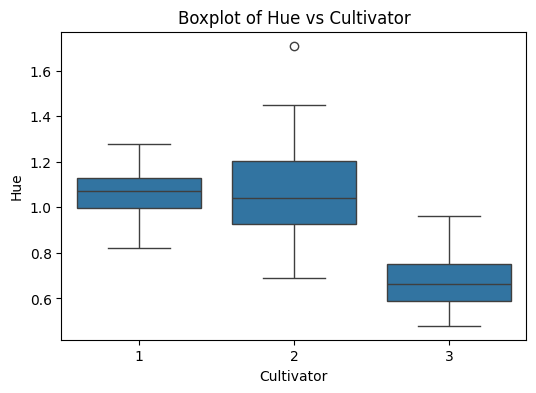

In [68]:
plot_boxplot(wine_df, 'Hue')

**Observations from Boxplot (Hue vs Cultivator):**

1. Cultivator 1 has a tight distribution with Hue values centered around 1.05, showing minimal variability.
2. Cultivator 2 displays the widest range of Hue values, with a few outliers and a median similar to Cultivator 1.
3. Cultivator 3 has the lowest Hue values overall, with the median significantly lower than the other two groups.
4. The separation in median values and ranges suggests Hue could help differentiate Cultivator 3 from the others.
5. Cultivator 2's wide spread and outliers indicate greater diversity in Hue within this group.

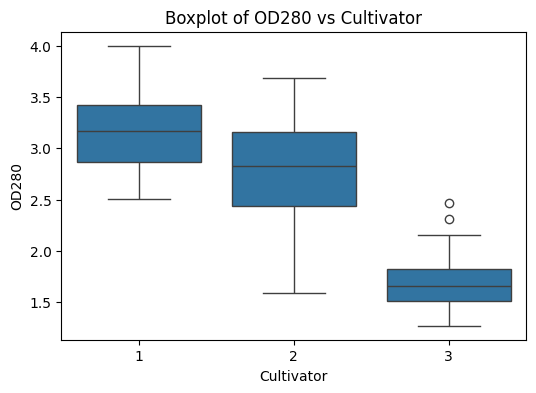

In [69]:
plot_boxplot(wine_df, 'OD280')

**Observations from Boxplot (OD280 vs Cultivator):**

1. Cultivators 1 and 2 have relatively higher OD280 values compared to Cultivator 3, with overlapping ranges.
2. Cultivator 1 has the highest median OD280 and the smallest spread among the three.
3. Cultivator 2 shows a slightly lower median than Cultivator 1 but with a wider range, suggesting greater variability.
4. Cultivator 3 has the lowest OD280 levels and shows a tight distribution with a few outliers.
5. OD280 may serve as a useful feature for distinguishing Cultivator 3 from the other two groups.

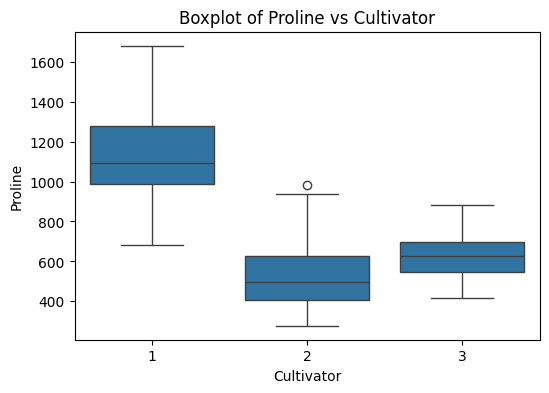

In [70]:
plot_boxplot(wine_df, 'Proline')

 boxplot observations:

**Observations from Boxplot (Proline vs Cultivator):**

1. Cultivator 1 shows the highest median Proline level and the widest range, indicating higher concentration and variability.
2. Cultivator 2 has the lowest Proline levels, with a narrower spread and one visible outlier.
3. Cultivator 3 has Proline levels higher than Cultivator 2 but lower than Cultivator 1, with a moderate range.
4. Proline appears to be a distinguishing feature between cultivators, particularly for identifying Cultivator 1.

In [71]:

# Data visualization using pairplot
# Note: Ensure 'Cultivator' column doesn't have missing or erroneous values
sns.pairplot(wine_df, diag_kind="kde", hue="Cultivator", palette='Dark2')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

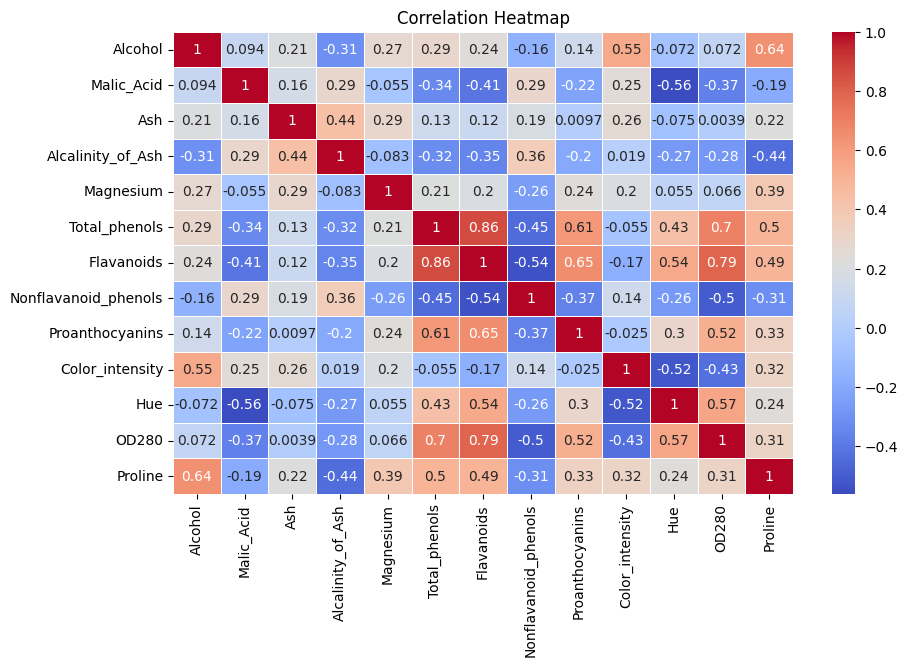

In [72]:
# Step 8: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(wine_df.drop(['Cultivator'], axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

 key observations from the correlation heatmap:

---

###  **Correlation Heatmap Summary**

####  **Strong Positive Correlations (> 0.7)**
- `Total_phenols` ↔ `Flavanoids` (**0.86**)
- `OD280` ↔ `Flavanoids` (**0.79**)
- `OD280` ↔ `Total_phenols` (**0.79**)
- `Alcohol` ↔ `Proline` (**0.64**)
- `Proanthocyanins` ↔ `Total_phenols` (**0.61**)

####  **Strong Negative Correlations (< -0.5)**
- `Hue` ↔ `Malic_Acid` (**-0.56**)
- `Flavanoids` ↔ `Malic_Acid` (**-0.41**)
- `Color_intensity` ↔ `Hue` (**-0.52**)
- `Flavanoids` ↔ `Nonflavanoid_phenols` (**-0.54**)

####  **Low/No Correlation (~0)**
- `Ash` ↔ `OD280` (**0.0039**)
- `Proanthocyanins` ↔ `Color_intensity` (**-0.025**)
- `Alcohol` ↔ `Nonflavanoid_phenols` (**-0.16**)

####  **Insights**
- **Flavanoids**, **Total_phenols**, and **OD280** are highly interrelated → May consider dimensionality reduction or choose one.
- **Proline** correlates well with both **Alcohol** and **Total_phenols**.
- Negative correlations (e.g., `Malic_Acid` vs `Hue`) suggest trade-offs in chemical properties (e.g., acidity vs. color).

---


In [73]:
# Split data into features (X) and labels (y)
X = wine_df.drop("Cultivator", axis=1)  # Features (drop target column)
y = wine_df["Cultivator"]               # Target labels (Cultivator)

In [74]:
# Splitting the dataset into training and testing sets (70% train, 30% test)
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [75]:
train_set.shape, test_set.shape

((124, 13), (54, 13))

In [76]:
# Instantiating and training the Naive Bayes model
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB()

In [77]:
# Checking model performance on training data
train_accuracy = model.score(train_set, train_labels)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 97.58%


In [78]:
# Predicting on the test set
test_pred = model.predict(test_set)

In [79]:
# Evaluating the model
print("\nClassification Report:\n", metrics.classification_report(test_labels, test_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(test_labels, test_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Confusion Matrix:
 [[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


This confusion matrix gives us insights into the performance of the Naive Bayes model on the test data for the wine classification problem. Let’s break it down:

### Matrix Structure:
The confusion matrix is a 3x3 matrix because we have three classes (cultivators) in the wine dataset. Each row corresponds to the **true labels**, and each column corresponds to the **predicted labels**.

```
[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]
```

- **Rows**: Represent the true labels.
  - 1st row: True class is Cultivator 1.
  - 2nd row: True class is Cultivator 2.
  - 3rd row: True class is Cultivator 3.

- **Columns**: Represent the predicted labels.
  - 1st column: Predicted as Cultivator 1.
  - 2nd column: Predicted as Cultivator 2.
  - 3rd column: Predicted as Cultivator 3.

### Breakdown:
1. **Top-left (23)**:
   - 23 samples that truly belong to **Cultivator 1** were correctly predicted as **Cultivator 1**.
   - **True Positives (TP)** for Cultivator 1.

2. **Middle-right (0, row 1)**:
   - 0 samples from **Cultivator 1** were misclassified as **Cultivator 2** or **Cultivator 3**.
   - This indicates no false positives for these misclassifications.

3. **Middle row (1, 18)**:
   - 1 sample that truly belongs to **Cultivator 2** was incorrectly predicted as **Cultivator 1** (False Negative).
   - 18 samples that truly belong to **Cultivator 2** were correctly predicted as **Cultivator 2** (True Positives).

4. **Bottom-right (12)**:
   - 12 samples that truly belong to **Cultivator 3** were correctly predicted as **Cultivator 3** (True Positives).
   - No misclassifications for Cultivator 3.

### Observations:
- **Cultivator 1** and **Cultivator 3** are perfectly classified: 23/23 and 12/12 samples were predicted correctly.
- **Cultivator 2** had 1 misclassification: 1 sample was predicted as Cultivator 1, but otherwise, 18 samples were correctly classified.
- There are no instances where a sample was predicted as Cultivator 3 when it should have been from another class, indicating the model is quite confident in identifying Cultivator 3.

### Summary:
- **High Accuracy**: The model performs well on this dataset, correctly predicting most of the test samples with only a small error (1 misclassification).
- **Potential for Improvement**: Cultivator 2 had a single misclassification, which could be an area for fine-tuning if needed.

This confusion matrix indicates strong performance, with only minor errors.

In [80]:

# K-Fold Cross-Validation
# Use 10-fold cross-validation to assess model performance
cv_scores = cross_val_score(model, train_set, train_labels, cv=10)
print("\nCross-validated scores:\n", cv_scores)
print(f"Average cross-validation score: {np.mean(cv_scores) * 100:.2f}%")



Cross-validated scores:
 [1.         0.92307692 1.         1.         0.91666667 1.
 0.91666667 1.         1.         0.91666667]
Average cross-validation score: 96.73%


In [81]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


#-------------------------#
# 1. Gaussian Naive Bayes  #
#-------------------------#
# Gaussian Naive Bayes assumes that the features follow a normal distribution.
model_gnb = GaussianNB()
model_gnb.fit(train_set, train_labels)
train_accuracy_gnb = model_gnb.score(train_set, train_labels)
test_pred_gnb = model_gnb.predict(test_set)
print("\n### Gaussian Naive Bayes ###")
print(f"Training Accuracy: {train_accuracy_gnb * 100:.2f}%")
print("\nClassification Report:\n", metrics.classification_report(test_labels, test_pred_gnb))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(test_labels, test_pred_gnb))
# Comment: Use this model when your features are continuous and follow a normal (Gaussian) distribution.

#-----------------------------#
# 2. Multinomial Naive Bayes   #
#-----------------------------#
# Multinomial Naive Bayes works best with discrete features like word counts (common in text classification).
model_mnb = MultinomialNB()
model_mnb.fit(train_set, train_labels)
train_accuracy_mnb = model_mnb.score(train_set, train_labels)
test_pred_mnb = model_mnb.predict(test_set)
print("\n### Multinomial Naive Bayes ###")
print(f"Training Accuracy: {train_accuracy_mnb * 100:.2f}%")
print("\nClassification Report:\n", metrics.classification_report(test_labels, test_pred_mnb))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(test_labels, test_pred_mnb))
# Comment: This model is better for discrete features, especially for document classification, where features are counts.

#--------------------------#
# 3. Bernoulli Naive Bayes  #
#--------------------------#
# Bernoulli Naive Bayes is suitable for binary/boolean features, such as if a word occurs in a document or not.
model_bnb = BernoulliNB()
model_bnb.fit(train_set, train_labels)
train_accuracy_bnb = model_bnb.score(train_set, train_labels)
test_pred_bnb = model_bnb.predict(test_set)
print("\n### Bernoulli Naive Bayes ###")
print(f"Training Accuracy: {train_accuracy_bnb * 100:.2f}%")
print("\nClassification Report:\n", metrics.classification_report(test_labels, test_pred_bnb))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(test_labels, test_pred_bnb))
# Comment: BernoulliNB works best for binary feature values like {0, 1} or True/False.

#----------------------------#
# Cross-Validation for Models #
#----------------------------#
# K-Fold Cross-Validation to evaluate each model
print("\n### Cross-Validation Scores ###")
for model_name, model in zip(['GaussianNB', 'MultinomialNB', 'BernoulliNB'], [model_gnb, model_mnb, model_bnb]):
    cv_scores = cross_val_score(model, train_set, train_labels, cv=10)
    print(f"{model_name} Average CV Score: {np.mean(cv_scores) * 100:.2f}%")



### Gaussian Naive Bayes ###
Training Accuracy: 97.58%

Classification Report:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Confusion Matrix:
 [[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]

### Multinomial Naive Bayes ###
Training Accuracy: 87.10%

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.87      0.91        23
           2       0.78      0.95      0.86        19
           3       0.90      0.75      0.82        12

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.86        54
weighted avg       0.88      0.87      0.87        54


Confusion Matri

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MultinomialNB Average CV Score: 83.78%
BernoulliNB Average CV Score: 41.92%


#ASSIGNMENT:
 - Build a KNN for this problem
 - comapre the performance of all the three models